Визуализация батч-эффекта

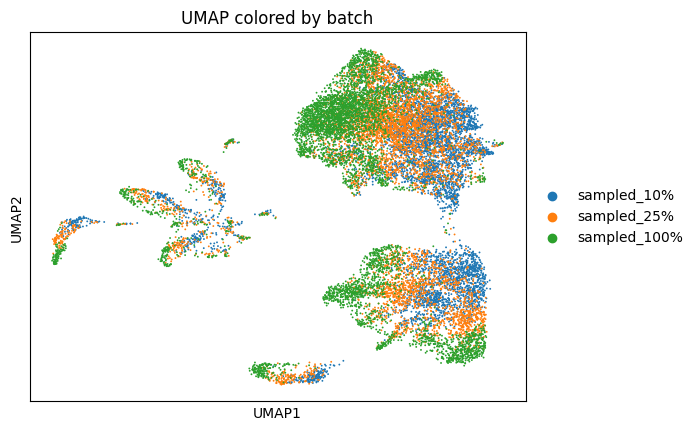

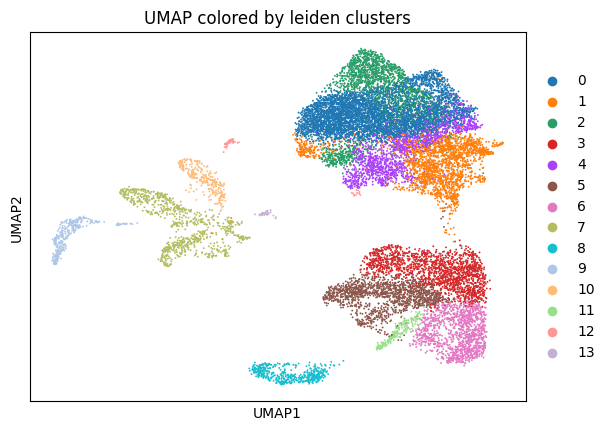

In [ ]:
#  UMAP с окраской по батчам и кластерам
sc.pp.scale(adata_combined, max_value=10)
sc.pp.pca(adata_combined, n_comps=20)
sc.pl.umap(adata_combined, color="batch", title="UMAP colored by batch")
sc.pl.umap(adata_combined, color="leiden", title="UMAP colored by leiden clusters")

<ipython-input-13-bbfea72ad11f>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_before = adata_combined.obs.groupby(["leiden", "batch"]).size().unstack().T


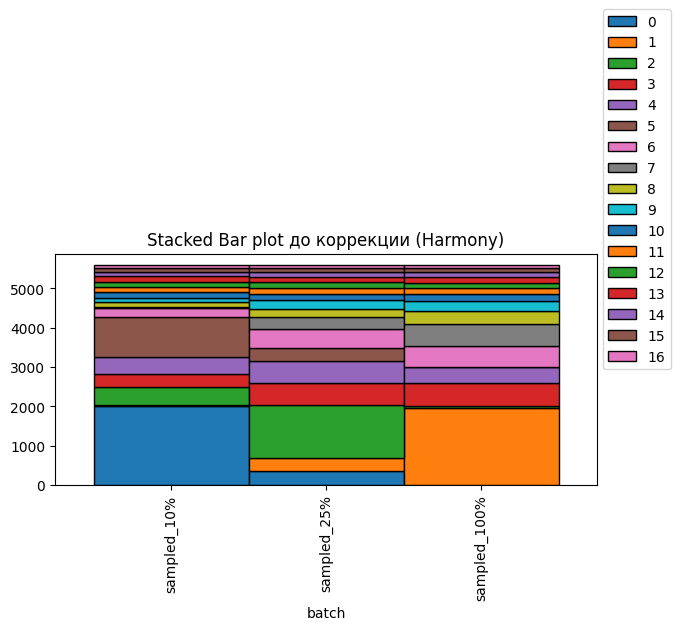

In [ ]:
# Stacked bar plot до коррекции (Harmony)
df_before = adata_combined.obs.groupby(["leiden", "batch"]).size().unstack().T
fig, ax = plt.subplots(figsize=(7, 3))
df_before.plot(kind="bar", stacked=True, width=1, edgecolor="black", ax=ax)
ax.legend(loc=(1.01, 0.5))
plt.title('Stacked Bar plot до коррекции (Harmony)')
plt.show()

Коррекция

/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


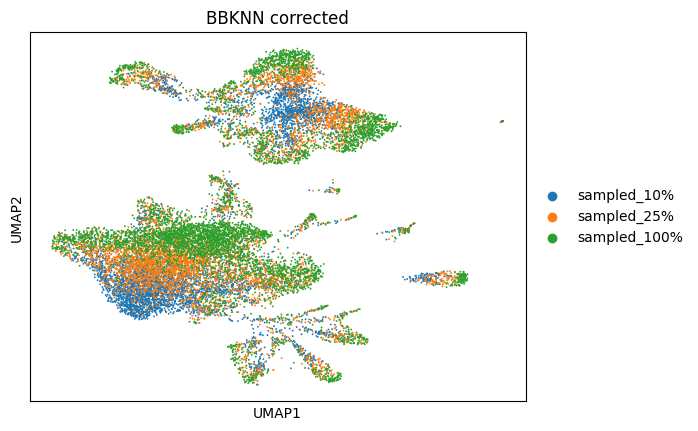

/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
2024-12-25 21:26:33,449 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
INFO:harmonypy:Computing initial centroids with sklearn.KMeans...
2024-12-25 21:26:36,901 - harmonypy - INFO - sklearn.KMeans initialization complete.
INFO:harmonypy:sklearn.KMeans initialization complete.
2024-12-25 21:26:37,018 - harmonypy - INFO - Iteration 1 of 30
INFO:harmonypy:Iteration 1 of 30
2024-12-25 21:26:41,699 - harmonypy - INFO - Iteration 2 of 30
INFO:harmonypy:Iteration 2 of 30
2024-12-25 21:26:47,867 - harmonypy - INFO - Iteration 3 of 30
INFO:harmonypy:Iteration 3 of 30
2024-12-25 21:26:52,596 - harmonypy - INFO - Iteration 4 of 30
INFO:harmonypy:Iteration 4 of 30
2024-12-25 21:26:57,693 - harmonypy - INFO - Iteration 5 of 30
INFO:harmonypy:Iteration 5 of 30
2024-12-25 

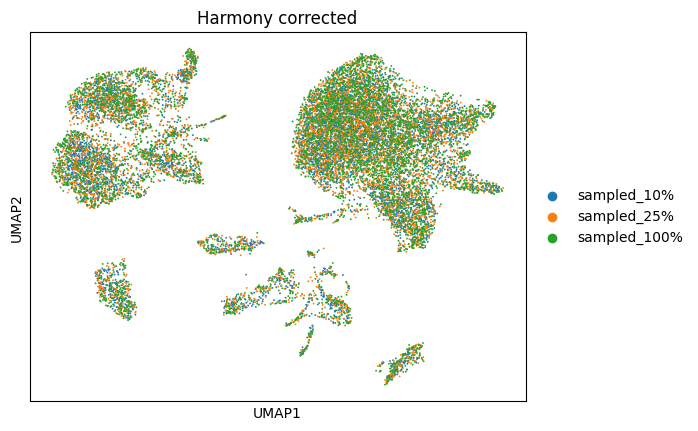

In [ ]:
# Batch correction BBKNN
def correct_bbknn(adata):
    adata_copy = adata.copy()
    sc.pp.pca(adata_copy)
    bbknn.bbknn(adata_copy, batch_key='batch')
    sc.tl.umap(adata_copy)
    sc.pl.umap(adata_copy, color="batch", title=f'BBKNN corrected')
    return adata_copy

# Batch correction Harmony
def correct_harmony(adata):
    adata_copy = adata.copy()
    sce.pp.harmony_integrate(adata_copy, key="batch", max_iter_harmony=30)
    sc.pp.neighbors(adata_copy, use_rep="X_pca_harmony")
    sc.tl.umap(adata_copy)
    sc.pl.umap(adata_copy, color="batch", title=f'Harmony corrected')
    return adata_copy



# Коррекция BBKNN
adata_bbknn_corrected = correct_bbknn(adata_combined)
# Коррекция Harmony
adata_harmony_corrected = correct_harmony(adata_combined)


plt.show()

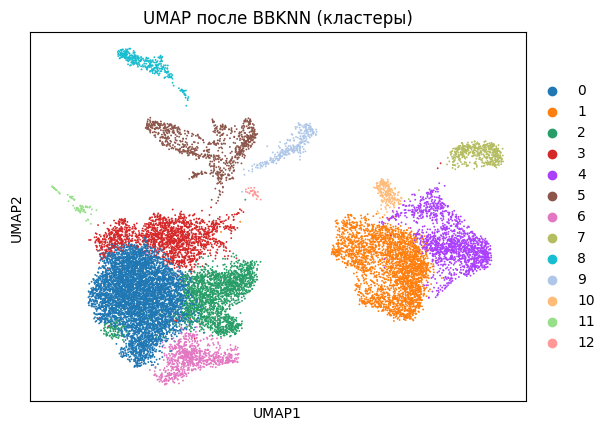

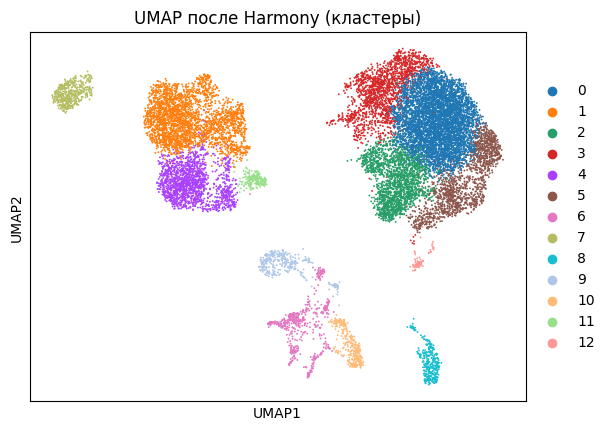

In [ ]:
# Выделение кластеров (после BBKNN)
sc.tl.leiden(adata_bbknn_corrected, resolution=0.5)

# Визуализация UMAP по кластерам после коррекции BBKNN
sc.pl.umap(adata_bbknn_corrected, color='leiden', title='UMAP после BBKNN (кластеры)')
plt.show()

# Выделение кластеров (после Harmony)
sc.tl.leiden(adata_harmony_corrected, resolution=0.5)

# Визуализация UMAP по кластерам после коррекции Harmony
sc.pl.umap(adata_harmony_corrected, color='leiden', title='UMAP после Harmony (кластеры)')
plt.show()

<ipython-input-36-c2673a408707>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_harmony = adata_combined.obs.groupby(["leiden", "batch"]).size().unstack().T


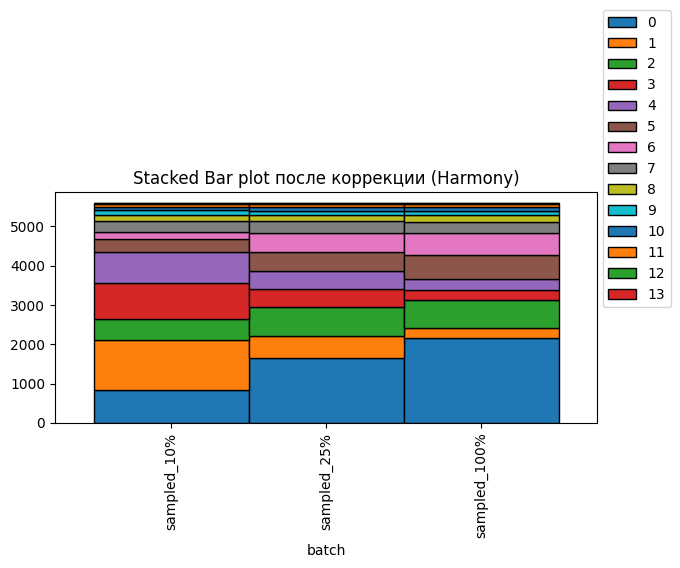

In [ ]:
# Stacked bar plot (после Harmony)
df_harmony = adata_combined.obs.groupby(["leiden", "batch"]).size().unstack().T
fig, ax = plt.subplots(figsize=(7, 3))
df_harmony.plot(kind="bar", stacked=True, width=1, edgecolor="black", ax=ax)
ax.legend(loc=(1.01, 0.5))
plt.title('Stacked Bar plot после коррекции (Harmony)')
plt.show()

UMAP до коррекции показывает, что сэмплы с разной глубиной секвенирования образуют отдельные области. UMAP после коррекции показывает, что эти области перемешиваются.  Stacked Bar plot показывает, что “батчи” равномерно распределены по кластерам после коррекции.